In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((517, 12, 1), (517,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1936 - root_mean_squared_error: 0.4400

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 8s 102ms/step - loss: 0.1906 - root_mean_squared_error: 0.4365 - val_loss: 0.1710 - val_root_mean_squared_error: 0.4135
Epoch 2/50
39/53 [=====================>........] - ETA: 0s - loss: 0.1556 - root_mean_squared_error: 0.3945

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.1514 - root_mean_squared_error: 0.3891 - val_loss: 0.1502 - val_root_mean_squared_error: 0.3875
Epoch 3/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1177 - root_mean_squared_error: 0.3430

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.1216 - root_mean_squared_error: 0.3487 - val_loss: 0.1287 - val_root_mean_squared_error: 0.3588
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.0998 - root_mean_squared_error: 0.3159

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0998 - root_mean_squared_error: 0.3159 - val_loss: 0.1107 - val_root_mean_squared_error: 0.3327
Epoch 5/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0738 - root_mean_squared_error: 0.2716

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0790 - root_mean_squared_error: 0.2811 - val_loss: 0.0951 - val_root_mean_squared_error: 0.3084
Epoch 6/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0665 - root_mean_squared_error: 0.2578

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0604 - root_mean_squared_error: 0.2458 - val_loss: 0.0773 - val_root_mean_squared_error: 0.2780
Epoch 7/50
39/53 [=====================>........] - ETA: 0s - loss: 0.0458 - root_mean_squared_error: 0.2140

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0458 - root_mean_squared_error: 0.2141 - val_loss: 0.0624 - val_root_mean_squared_error: 0.2498
Epoch 8/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0389 - root_mean_squared_error: 0.1972

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0371 - root_mean_squared_error: 0.1925 - val_loss: 0.0483 - val_root_mean_squared_error: 0.2197
Epoch 9/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0273 - root_mean_squared_error: 0.1652

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0260 - root_mean_squared_error: 0.1613 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1865
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1518

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0247 - root_mean_squared_error: 0.1571 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1683
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0213 - root_mean_squared_error: 0.1461

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0196 - root_mean_squared_error: 0.1400 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1348

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0176 - root_mean_squared_error: 0.1327 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1194

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 14/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0173 - root_mean_squared_error: 0.1315

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0165 - root_mean_squared_error: 0.1285 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0757
Epoch 15/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1133

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0678
Epoch 16/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1138

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 17/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1131

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 55ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 18/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1093

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0577
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0736
Epoch 20/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0965
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 22/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1091

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0574
Epoch 23/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1189

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 25/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 26/50
41/53 [======================>.......] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1092

INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


INFO:tensorflow:Assets written to: Baffin_model_LT10\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0143 - root_mean_squared_error: 0.1194 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0549
Epoch 27/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0828
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 30/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651
Epoch 31/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0140 - root_mean_squared_error: 0.1183 - val_loss: 0.0083 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.5096248467763265 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

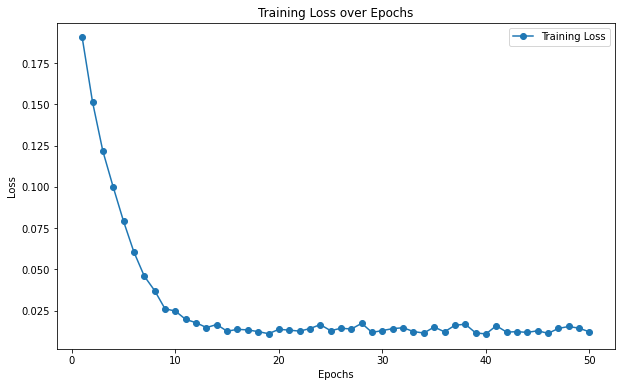

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

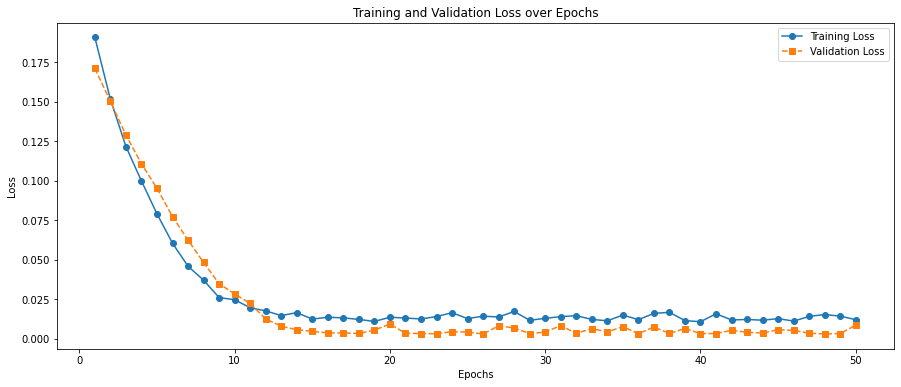

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.05648445105186961


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.04155039393898576


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

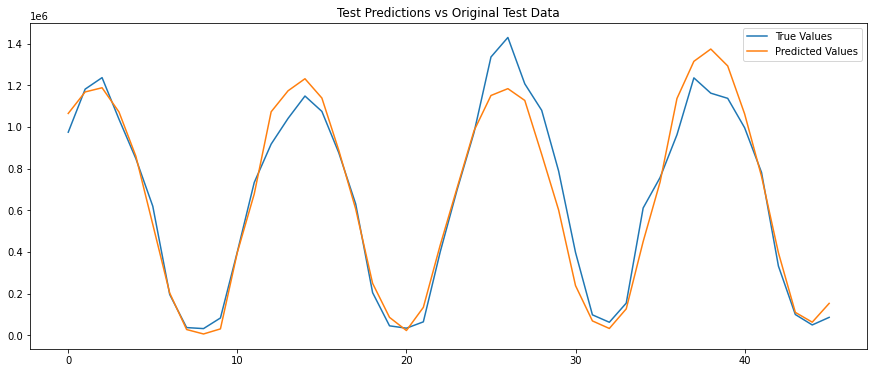

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.004461480948194957


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.04989292026710174


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

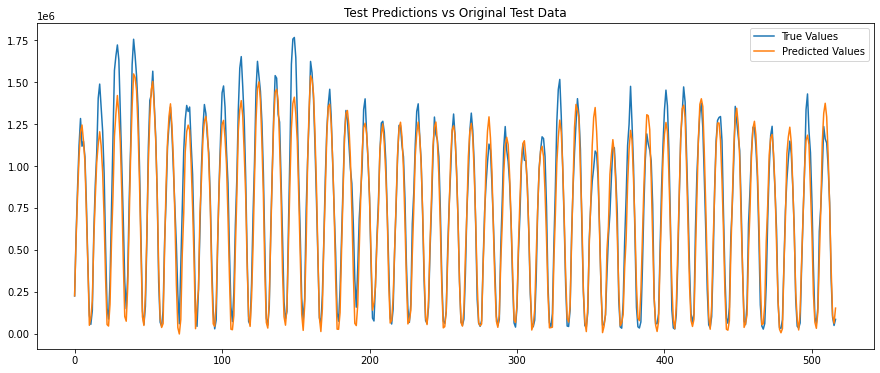

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()